# Ice Video Games

I work for the online store Ice, which sells video games all over the world. I need to identify patterns that determine whether a game succeeds or not to spot potential big winners and plan advertising campaigns.

## Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('/games.csv')

    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
      
A big plus for using `try-except`, good job!

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Conclusion

Year of Release will need to be converted to an int and it seems there's a big amount of NaN's here. User score needs to be a float.

## Data Reprocessing

In [4]:
# Lowercase all column titles
df.columns = df.columns.str.lower()

# Convert float year into integer
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Convert 'tbd' in user score to NaN
df.loc[df['user_score'] == 'tbd'] = np.nan

# Convert user score to float
df['user_score'] = df['user_score'].astype(float)

In [5]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
# New columns for total sales
df['all_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# There wasn't any duplicate rows

In [7]:
df.isna().mean() * 100

name               14.513910
platform           14.501944
year_of_release    15.824110
genre              14.513910
na_sales           14.501944
eu_sales           14.501944
jp_sales           14.501944
other_sales        14.501944
critic_score       57.792402
user_score         54.591684
rating             54.681424
all_sales           0.000000
dtype: float64

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
    
Ok, Tyler,  it is important to analyse the percentage of missing values in columns, for example, like this:
    
`data.isna().sum()*100/len(data)`
       
`data.isna().mean() * 100`

Or like this:
    
`report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)`

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Tyler, it is great that you tried to check the percentage of missing values per column, good job!

In [8]:
# Filter out platforms with less than 200 games
df = df.groupby('platform').filter(lambda x: len(x) > 200)
df = df.reset_index(drop=True)

### Conclusion

The dataframe shows a lot of 0.00 values and NaN values, however it would be better if these are left as-is as the 0's indicate a failing game's profit and the NaN's do not affect our calculations. The reason for NaN's may be that some such as critic score, user score, and rating are perhaps normal in the US, EU, and Japan may not be the case outside of these countries and as such the games that have NaN values for those columns are games made outside of those countries. I also filtered out platforms will very small values.

There are also NaNs for the game names, I will leave these as it may still contribute to our overall findings, same with the rest of the data. Ultimately it doesn't seem to be an issue.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary<a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
Ok, Tyler, what you did absolutely correct at the step of the preprocessing of the data:
        
1) the data types are changed correctly
        
2) you correctly preprocessed the `tbd` value, keep it up!
        
3) also I agree with your strategy of preprocessing missing values in columns `critic_score` and `user_score`.  In fact, we do not know why the data in these columns is missing (we can only hypothesize as you did), and we do not have access to a source that would allow us to replenish the data, restore it, so it is better leave missing values in the data and simply replace them with indicators. Missing values are also some kind of signal worth paying attention to and analyzing, it is valuable in its own way! The analyst's goal when working with missing values is not about filling the 100% of missing values! When filling missing values, it is important to proceed from the specifics of the data, take into account the risks of data distortion and the introduction of artificial trends and characteristics.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary<a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
    

For rating it is better to replace NaN values in the column `rating` with `unknown`as marker because, again, if we try to fill in missing values in this column in other ways we face the risk of distortion of the original data. What is more important is that at the next steps of the analysis we need to analyse the rating by the region, and at this step it is better to analyse the games without rating!


<font color='Purple'>Student's commentary:</font> **I was planning on not filling in the NaN values, so I don't see how it wo** <a class="tocSkip">

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, I understand your point of view, but it seems to me that in case of rating it is better to marker the NaN values with default marker value and include it in the analysis.

## Analyze

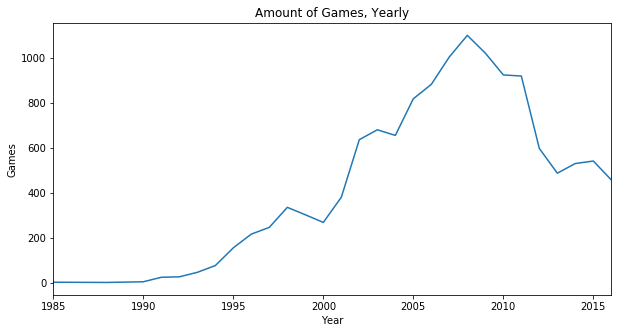

In [9]:
count_pvt = df.pivot_table(index='year_of_release', aggfunc='count')
count_pvt = count_pvt['all_sales']
count_pvt.plot(title='Amount of Games, Yearly', figsize=(10,5))
plt.xlabel('Year');
plt.ylabel('Games');

There is a large rise in games from 1980 to 2008 to where it hits its peak, then rapidly lowers. The reason for this is unclear.

In [10]:
# Listing all platforms
df['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', 'PS4', '3DS',
       'N64', 'PS', 'XB', 'PC', 'PSP', 'XOne', 'GC', 'PSV'], dtype=object)

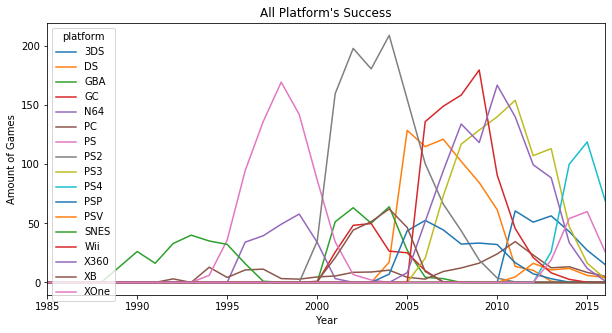

In [11]:
all_platforms = df.pivot_table(index='year_of_release', values='all_sales', columns='platform', aggfunc='sum').fillna(0).plot(
title="All Platform's Success", figsize=(10,5))
plt.xlabel('Year');
plt.ylabel('Amount of Games');

Using the graph above I believe the best time period to predict 2017 games will be the 2012-16 period. New platforms typically rised and died out in a matter of a 5 or 6 years, and new platforms would take rise even while other platforms were at their peak. All platforms of 2016 are sinking in popularity but there are no new platforms taking their place. We may expect to see a new one very soon.

In [12]:
# Cut out all irrelevant data
filtered_df = df[df['year_of_release'] > 2012]
filtered_df.reset_index(inplace=True, drop=True)

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary<a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
Ok, Tyler, the 2012 can be chosen as the lower border of the current period. If we choose a longer period, it can be a risk of capturing a lagging trend, i.e. we include in the data irrelevant pre-period platforms that should not remain in the data for the predicted period.
        
I can even recommend to use 2013 or 2014 year as the lower border of the currect period. The year that can be considered as boundary of the current period, can be determined by building histograms for each platform. The histograms will show that games lose relevance within 3-4, maximum 5 years, at the same time the lifespan of the platform is on average about 10 years. The final year of the dataset is 2016, so we subtract 3-4 years from 2017 (as the year for which we buid the prediction) and get a year, which can be considered the boundary of the current period.

In [13]:
filtered_df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales')

,all_sales
platform,
DS,0.97
PSP,3.50
Wii,10.87
PSV,32.68
PC,39.34
X360,135.43
3DS,141.70
XOne,158.77
PS3,180.10


Looking at the list above, the PS3, PS4, and XOne are the most profitable platforms right now for our advertising.

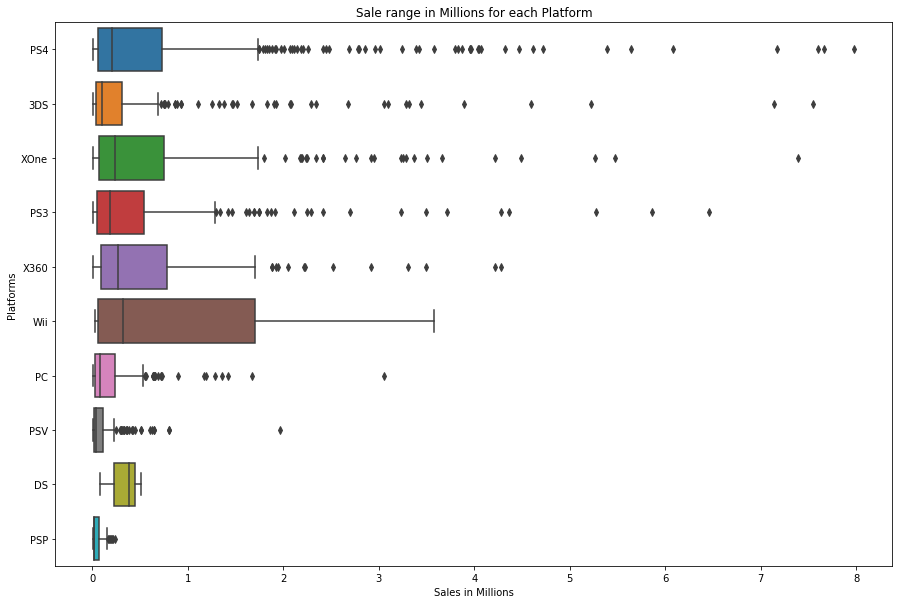

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(x='all_sales', y='platform', data=filtered_df[filtered_df['all_sales'] < 8]);
plt.title('Sale range in Millions for each Platform')
plt.xlabel('Sales in Millions');
plt.ylabel('Platforms');

Despite the PS3 and PS4 being clear leaders in terms of profitability, Wii has a much higher average and spread of sale profits but little to no big hit games. Some platforms have much bigger hit games that sway in their favor of the sales total for each platform. The differences between some platforms are very large.

I also cut off some of the outliers so the graph would have a lower reach and more clearly show the differences between the botplots.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
As a whole the logic of your analysis is correct, but at this step of the project you need to build the boxplot for all platforms that are in the current period, not only for potentially profitable.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, good job! Also one tip for appearance of boxplots: you can use argument `showfliers = False` to remove the outliers from your visualization.

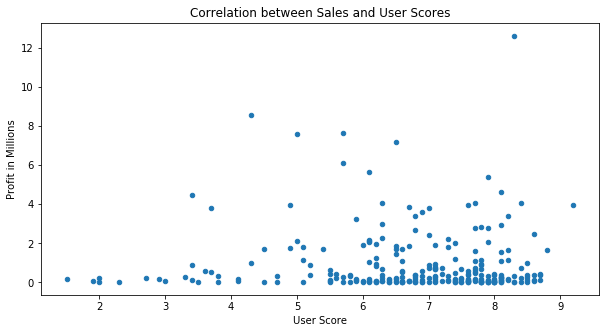

In [15]:
rating_df = filtered_df[filtered_df['platform'] == 'PS4']
rating_df.plot(x='user_score', y='all_sales', kind='scatter', figsize=(10,5), 
               title='Correlation between Sales and User Scores');
plt.xlabel('User Score');
plt.ylabel('Profit in Millions');

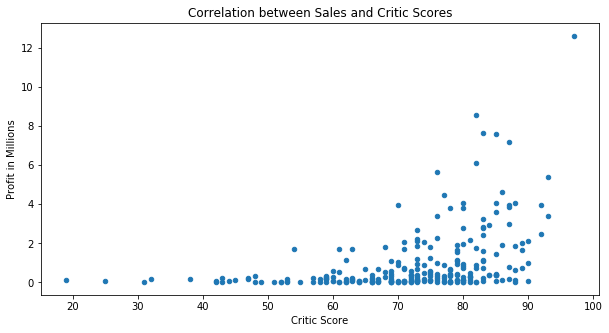

In [16]:
rating_df.plot(x='critic_score', y='all_sales', kind='scatter', figsize=(10,5), 
               title='Correlation between Sales and Critic Scores');
plt.xlabel('Critic Score');
plt.ylabel('Profit in Millions');

In [17]:
print('The correlation between critic scores and sales:', rating_df['critic_score'].corr(rating_df['all_sales']))
print('The correlation between user scores and sales:', rating_df['user_score'].corr(rating_df['all_sales']))

The correlation between critic scores and sales: 0.4064685741971657
The correlation between user scores and sales: -0.031957110204556424


Looking at the two graphs, critic scores tend to be closer in their reflection of the sales with their reviews. User scores are much more varying and can have a noticable amount of low ratings for high profit games. This may reflect that users buy games even if some parts of it are very unpopular. 

When it comes to user scores there there is a slight negatively correlation between reviews and sales while there seems to be a good correlation between good critic scores and sales.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 

If you use the visualization in your project,  it is better to pay more attention to the formatting and appearance of the plots! Please, add the common titles and x and y axis labels to all the graphs in your project! It is important because it makes it easier to understand and read the visualization especially for the external observer who is not immersed in the specifics of your project! Technical strings like `<matplotlib.axes._subplots.AxesSubplot at 0x7f69fa0023d0>` you can delete using `plt.show()` method 
       
A couple of links about how to add x and y axis labels:
        
https://www.kite.com/python/answers/how-to-add-axis-labels-to-a-plot-in-matplotlib-in-python
        
https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
       
So, please, try to improve all the plots in your project.

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
Also apart from building scatter plots you need to calculate the correlation and interpret the results, so, please, try to do it!

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, good job, agree with your improvements!

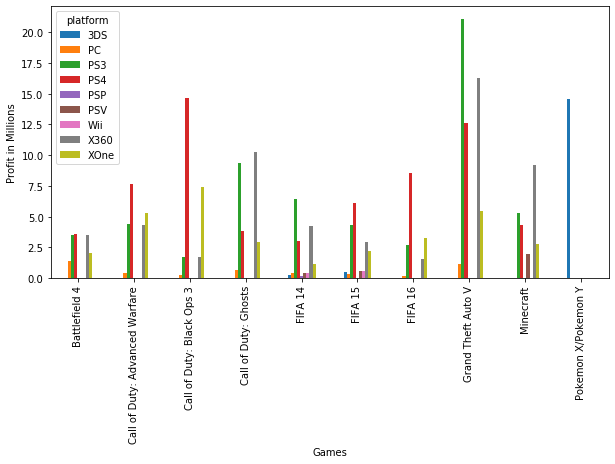

In [18]:
top_games = (filtered_df
 .pivot_table(index='name', values='all_sales', aggfunc='sum')
 .sort_values('all_sales', ascending=False)).head(10)

filtered_df[filtered_df['name'].isin(top_games.index)].pivot_table(values='all_sales', index='name',
               columns='platform', aggfunc='sum').plot(kind='bar', figsize=(10,5));
plt.xlabel('Games');
plt.ylabel('Profit in Millions');

Some games preform much better on some platforms than others, while those same platforms that preformed worse can preform better with different games. Overall, PS3, PS4, and Xbox 360 tend to be better sellers across all games. This somewhat fits our earlier findings except for the Xbox 360 being a bigger success than the Xbox One with these 10 games.

In [19]:
filtered_df.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False)

,all_sales
genre,
Action,303.33
Shooter,227.23
Sports,147.75
Role-Playing,143.96
Misc,53.74
Racing,32.28
Fighting,29.14
Platform,25.74
Adventure,22.60


Action and Shooter games are the most profitable genres, noticably outpreforming most other categories. Generally speaking, a game made in one or more of the top categories will likely preform much better than games in the lowest ones, especially puzzle games. There's no data to help understand why this may be the case.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Also you can try to calculate also the median or mean sales, not only sum, the leader will change!

<font color='Purple'>Student's commentary:</font> **I did check the mean/median sales, actually! But I decided that since we're looking for specific games, not genres as a whole, it would be best to focus only on the sum. It would make sense to look at the median if we were to look for which game type a developer should focus on making, but not here, no?** <a class="tocSkip">

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Tyler, as a whole your logic is correct. But sometimes different statistics/methods etc can provide different results that is why in some cases it is important additionally check such tricky moments. It seems to me that we can look at the median in case of this task too, because we try to evaluate the sales per genre, so, we can look at sum sales, mean or median sales and compare results.😉

### Conclusion

Using the data we've gathered in this step we would expect the next big games to be on PS3 or PS4, and to be an Action and/or Shooter genre of game. Critic scores may be partially useful for helping determine this.

## User Profiles by Region

### North America

In [20]:
filtered_df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales')

,na_sales
platform,
PSP,0.00
DS,0.46
PSV,5.03
Wii,5.46
PC,11.11
3DS,37.71
PS3,63.27
X360,80.90
XOne,92.77


In [21]:
filtered_df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales')

,na_sales
genre,
Puzzle,0.15
Strategy,2.79
Simulation,4.50
Adventure,6.79
Racing,9.59
Platform,10.36
Fighting,12.34
Misc,24.04
Role-Playing,45.72


In [22]:
filtered_df.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales')

,na_sales
rating,
E10+,43.69
T,47.51
E,66.08
M,164.14


### Europe

In [23]:
filtered_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales')

,eu_sales
platform,
PSP,0.17
DS,0.43
Wii,4.46
PSV,5.95
PC,25.27
3DS,30.11
X360,42.04
XOne,51.43
PS3,67.23


In [24]:
filtered_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales')

,eu_sales
genre,
Puzzle,0.57
Strategy,3.86
Fighting,7.11
Adventure,7.66
Platform,10.15
Simulation,10.64
Misc,16.98
Racing,17.82
Role-Playing,36.50


In [25]:
filtered_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales')

,eu_sales
rating,
E10+,33.81
T,40.42
E,73.75
M,144.55


### Japan

In [26]:
filtered_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales')

,jp_sales
platform,
DS,0.00
PC,0.00
Wii,0.05
XOne,0.34
X360,0.50
PSP,3.29
PS4,15.96
PSV,18.48
PS3,22.98


In [27]:
filtered_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales')

,jp_sales
genre,
Puzzle,0.96
Racing,0.99
Strategy,1.48
Platform,2.38
Simulation,4.46
Sports,4.89
Shooter,5.06
Adventure,5.82
Fighting,6.62


In [28]:
filtered_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales')

,jp_sales
rating,
E10+,3.47
E,9.76
M,13.87
T,19.67


### Conclusion

The top platforms in NA and Europe are both the same in that they favor the Xbox and Playstation platform series, but in the case of Japan the 3DS is much more popular than either of the other two, but with PS3 just behind. 

For genres in NA and Europe once again Action, Shooter, and Sports are the most popular whereas in Japan Role-Playing and Action are the most popular with all other categories far behind.

With maturaty ratings NA and Europe have the same hierarchy with M, E, then T, but in Japan the Teen rating is the most widely sold with M and then E behind it.

It's quite apparent by this point North America and Europe have almost identical game preferences in genre, maturing ratings, and platform. However, with Japan a lot of these are flipped, as even the 3DS which is the most popular there is only 5th elsewhere. It is most likely the case that careful investigation into games in Japan will be necessary for a successful ad campain.

    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, the logic of the analysis at this step is correct, keep it up!

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary<a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
       
It is important to analyse games without rating.

<font color='Purple'> Student's commentary:</font> **By this do you mean I didn't focus enough on the other parts of the data, and should have talked more about the rest of it such as genres?** <a class="tocSkip">

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
By this comment I mean that it would be nice to look at the contribution of the games without ratings to the common picture per region, because yes, at the column rating we have no data, but for these NaN values in these columns we have data in other columns and we can analyse (not lose) it replacing the NaN with marker.

## Test Hypothesis

**Null:** Average user ratings of the Xbox One and PC platforms are the same.

**Alternative:** Average user ratings of the Xbox One and PC platforms vary.

    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Tyler, H0 and H1 are formulated correctly!

In [29]:
results = st.ttest_ind(filtered_df.loc[filtered_df['platform'] == 'XOne']['user_score'],
                       filtered_df.loc[filtered_df['platform'] == 'PC']['user_score'], nan_policy = 'omit', equal_var = False)

alpha = 0.05

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.1475959401343003
We can't reject the null hypothesis


    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Good job! It is absolutely correct to exclude the NaN values from samples when we use Students' t-test for statistical hypotheses testing!

**Null:** Average user ratings for the Action and Sports genres are the same.

**Alternative:** Average user ratings for the Action and Sports genres vary.

In [30]:
results = st.ttest_ind(filtered_df.loc[filtered_df['genre'] == 'Action']['user_score'],
                       filtered_df.loc[filtered_df['genre'] == 'Sports']['user_score'], nan_policy = 'omit', equal_var = False)

alpha = 0.05

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  8.063003736608425e-20
We reject the null hypothesis


    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Yes, you are right!

### Conclusion

I formulated the null hypothesis as neutral hypothesis as that's how null hypothesis are supposed to be, and came out as the ratings being the same. The alternative would then naturally be the opposite conclusion. I chose a significance level of 5% as this is the typical alpha to use, but even at as high as 10% the results would be the same.

We can't reject the possibility that the average user ratings of the Xbox One and PC platforms are similar, but in the case of Actions and Sports genres the user ratings provably vary.

## Overall Conclusion

Overall the most successful games for advertising campains typically fall into the category of being Sports, Actions, or Shooter; on the PS4, Xbox One, or 3DS in Japan; and rated M, E, or T in Japan. This was determined using the data but this may be skewed in favor of NA and Europe as it makes 2/3rds of our calculations. When it comes Japan successful games are much different and were the reason for 3DS being a popular choice of platform, but elsewhere 3DS is actually an underpreformer. It may be best to be cautious when choosing ad campains for Japan but elsewhere follows a more typical formula.

Critic scores may be a somewhat helpful for also finding successful games but critic scores do not make a game popular and may be wrong, so it should be seen as a loose guideline. Popular games can also vary among different platforms so the most popular platforms should recieve equal consideration.


The best patterns to look for for finding a strong game for our next ad campain would be a rated M game that falls under the Action and/or Shooter genre and is on the PS4. Or, in Japan, a rated T game that has Action and/or Role-playing in it, on the 3DS platform. A good critic rating is also a plus for our game candidate. 

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 


In the final conclusion it is important apart from summarizing your actions, provide some recommendations for the client! It is important to remember about the main aim of the analysis!
    
`You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.`

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, this time your final conclusion is more focused on the analysis main aim, you are doing great!

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion**

Tyler, thank you for submitting your project! I can see that you've worked really hard on it! I'm really impressed this the amount of work you have done. But there are several things in your project which I suppose it is important to fix in order to make your project really ideal! My comments will navigate you!


**Good things and practices in your project I want to highlight🙂**:

* You use different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* You worked with the visualization, it is really good that you use plots in your work and formatted them correctly!
* You correctly used test for statistical hypotheses testing.
    
**What is worth working on👀**:


* It is important to calculate correlation.
* Fix the final conclusion.
* Other recommendations you will find in my comments.


**Good luck! I will wait for your work for a second iteration of the review!😉**
![gif](https://media.giphy.com/media/VTtANKl0beDFQRLDTh/giphy.gif)  

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion: second iteration of the review**

Tyler, thank you for submitting your project with corrections!
    
You did a great job to improve the project, I can see your progress and agree with all your corrections, so I hasten to say that your project has been accepted and you can proceed to the next sprint!
    
**I wish you exciting and cool projects in the next sprints😉**

![gif](https://media.giphy.com/media/l3UcjBJUov1gCRGbS/giphy.gif)  